
# Rio Grande Valley, Texas Air Quality Notebook

**Welcome to our notebook on Rio Grande Air Quality!** 

In this notebook we will be looking at Air Quality Index (AQI) scores in the surrounding Rio Grande Valley, Texas area. With so many pollutants in the air, especially as we head into the annual fire season, AQI becomes something we check on the daily. For many of us, this AQI map is all too familiar. Throughout this module we will discuss how data can be used to visualize and uncover underlying trends in the world.

**Let's get started!**

<p align="center">
  <img src="images/Texas_AQI.png" width="600" height="600" align="center">
</p>

<br>

## Introduction to Jupyter Notebook

Before we get started with the data, let's talk about what Jupyter Notebook is. This lab is set up in a Jupyter Notebook. Notebooks can contain anything from live code, to written text, equations or visualizations. The content of notebooks are written into rectangular sections called **cells**. 

#### Types of Cells
There are two types of cells in Jupyter, **code** cells and **markdown** cells. **Code cells**, as you can imagine, contain code in Python, the programming language that we will be using throughout this notebook.  **Markdown cells**, such as this one, contain written text. You can select any cell by clicking on it one. 

#### Running Cells
'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a cell, you can do one of the following:

- press **Shift + Enter**
- click the **Run** button on the top tool bar

Running a markdown cell will embed the text into the notebook and running a code cell will evaluate the code and display its output under the cell. 

Let's try it! **Run the code cell below.**

In [31]:
print("Hello World!")

Hello World!


#### Editing and Saving

- To **edit** a cell, simply double click on the desired cell and begin typing. The cell that you are currently working in will be highlighted by a green box.
- To **save** the notebook, either click *Ctl + S* or navigate to the "File" dropdown and select "Save and Checkpoint"

#### Adding Cells
You can add a cell by clicking <b><code>Insert > Insert Cell Below</code></b> and choose the cell type in the drop down menu. Try adding a cell below to type in your name!


#### Deleting Cells 
To delete a cell, click on the <b><code>scissors</code></b> at the top or <b><code>Edit > Cut Cells</code></b>. Delete the cell below.

In [32]:
print("Delete this!")

Delete this!


**Important Tip**: Everytime you open a Jupyter notebook, it is extremely important to run all the cells from the beginning in order for the notebook to work. 

Now that we have had a brief crash course on Jupyter Notebooks, let's dive into Texas AQI!

<br>

## Introduction to the Data <a class="anchor" id="2"></a>

In this notebook we will look at data collected from PrupleAir, a company that manages a network of air quality sensors. The data from these sensors are then collected to create maps like the one displayed above that depicts an intuitive visualization of the air quality in a specific region. In the dataframe below, you will find several metrics that help us do this.

**Before we begin:**

- Click on <b><code>Cell</code></b> in the top toolbar  
- Click on <b><code>Run All</code></b> in the drop down
- Scroll back up to begin going through the notebook!

In [33]:
from IPython.display import HTML
hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:1" type="submit" value="Click here to reveal the raw code."></form>''')

In [34]:
hide_me
import matplotlib.pyplot as plt
import numpy as np
import purpleair
import folium
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from IPython.display import clear_output


In [35]:
! pip install purpleair

<br>

# PurpleAir Data

Before we begin looking at data collected from PurpleAir sensors, lets first take a look at what a sensor is, and what it measures. 


> Below is a picture of a real PurpleAir Air Quality Sensor. These sensor can be mounted both indoors or outdoors, and it tracks airborne particulate matter(PM) in real time using PMSX003 laser counters. Particulate matter can include things like dust, smoke, dirt and any other organic or inorganic particles in the air. With multiple sensors mounted in a region, PurpleAir can create a relatively accurate measure of AQI throughout the day as the air quality changes. 

For more information on how sensors work, take a look at the official PurpleAir website [here](https://www2.purpleair.com/community/faq#hc-what-do-the-numbers-on-the-purpleair-map-mean-1)!

<p align="center">
  <img src="images/purpleair-sensor-pm2.5.webp" width="" height="" align="center">
</p>

### Indoor versus Outdoor Sensors
Whether a sensor is located indoors or outdoors, it can make a huge difference. When it comes to outdoor sensors, it is much easier to regulate the air quality since the wind can alleviate the air quality and the factors that trigger an unhealthy air quality can be controlled. When it comes to indoor sensors, it is more difficult to control the air quality since buildings lack ventilation and the air quality inside can't be changed with a simple wind blow. In addition, there are more chemicals in the air to deal with indoors compared to outdoors. Examples of chemicals that can affect the air quality of a building indoors are cleaning products, dust, toxic gasses, smoke and more. 

In order to work with the data, we need to pull it into our workspace. Fortunately, PurpleAir has created an API that allows users to pull in and work with their AQI data. In the code cell below we will import the prupleair API and use it to create a dataframe of data from all the PurpleAir sensors!

In [36]:
hide_me

from purpleair.network import SensorList
p = SensorList()
df = p.to_dataframe(sensor_filter='all',
                    channel='parent')

Child 566 lists parent 565, but parent does not exist!
Initialized 22,528 sensors!


The dataframe below contains all the sensor data as of the latest update. It contains data on everything from the geograohical latitude and longitude of the sensor to data on the last time that sensor measured airborne PM.

In [37]:
hide_me

df

,parent,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,...,last_update_check,created,uptime,is_owner,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg
id,,,,,,,,,,,,,,,,,,,,,
14633,None,37.275561,-121.964134,Hazelwood canary,outside,7.72,76.0,24.444444,35.0,1011.26,...,None,None,None,False,5.69,5.36,7.48,14.92,15.60,9.77
25999,None,30.053808,-95.494643,Villages of Bridgestone AQI,outside,10.80,72.0,22.222222,55.0,1016.10,...,None,None,None,False,10.94,11.09,11.30,18.54,19.29,15.70
14091,None,37.883620,-122.070087,WC Hillside,outside,12.42,71.0,21.666667,42.0,1006.33,...,None,None,None,False,12.33,10.80,10.70,19.40,24.24,16.92
108226,None,38.573703,-121.439113,"""C"" Street Air Shelter",inside,7.47,77.0,25.000000,45.0,1019.11,...,None,None,None,False,6.73,6.32,5.81,6.38,7.14,5.29
49409,None,18.759182,99.017172,"""First's Place""",outside,35.10,76.0,24.444444,56.0,983.43,...,None,None,None,False,31.75,28.06,25.60,22.90,23.41,26.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64085,None,36.785883,127.157040,청룡동행정복지센터,outside,10.35,37.0,2.777778,38.0,1018.66,...,None,None,None,False,10.76,10.48,11.42,21.61,36.38,41.78
64995,None,36.691324,126.585255,한서대학교,outside,9.68,39.0,3.888889,39.0,1009.93,...,None,None,None,False,10.10,10.22,10.69,16.28,22.25,26.86
64093,None,36.710720,126.548390,해미읍성,outside,9.27,39.0,3.888889,41.0,1020.99,...,None,None,None,False,9.67,9.78,10.29,16.57,25.98,29.95


Here is a breakdown of the dataframe above and what each column represents. 

`lat`: The latitude coordinate of the location

`lon`: The longitude coordinate of the location

`name`: The name of the location

`location_type`: The nature of the location (ie. inside or outside)

`pm_2.5`: The level of fine particulate matter in the air of that location

`temp_f`: The temperature of the location in degrees Farenheit 

`temp_c`: The temperature of the location in degrees Celsius 

`humidity`: The humidity percentage of the location

`pressure`: The pressure index of the location (in millibars)

`last_seen`: The last seen date and timestamp in UTC

`model`: Model of the specific sensor

`flagged`: Whether or not the channel was marked as flagged (usually based on a fault)

`age`: Sensor data age (when data was last received)

`10min_avg`: Average PM 2.5 AQI over the last 10 minutes 

`30min_avg`: Average PM 2.5 AQI over the last 30 minutes

`1hour_avg`: Average PM 2.5 AQI over the last hour

`6hour_avg`: Average PM 2.5 AQI over the last 6 hours

`1day_avg`: Average PM 2.5 AQI over the last day 

`1week_avg`: Average PM 2.5 AQI over the last week


<br>

### Airborne Particulate Matter (PM) 2.5 
While many of the column names are relatively straightforward, such as the "name" column (which displays the set name of the particular sensor), the "location_type" column (which indicates where it is an indoor or outdoor sensor), etc., we would like to draw your attention to the "pm_2.5" column. 

>The "pm_2.5" column represents the count of airborne pm that is larger than 2.5um/dl, in otherwords, airborne particles that have a diameter of 2.5 micrometers or less. In high levels, PM 2.5 particles can reduce visibility and cause the air to appear hazy. Tracking PM 2.5 is important because prolonged exposure to high levels of PM 2.5 particles can cause adverse US Environmental Protection Agency (EPA) use to calculate the local Air Quality Index (AQI).

### El Gordo Sensor - Rio Grande Valley

If you go to the PurpleAir website [here](https://map.purpleair.com/1/mAQI/a10/p604800/cC0#13.53/26.40366/-98.99406), it should navigate you to a map of the surrounding Rio Grande Valley area in Texas. If you click on the sensors, you'll find that the name of that particular sensor is "Carnes Asadas El Gordo #1". 

Let's take a closer look at a particular sensor in Rio Grande Valley! If we look at the PurpleAir map, it shows that a sensor named "Carnes Asadas El Gordo #1" has a significantly higher AQI compared to its surrounding sensor readings. Let's see if we can figure out why. In the dataframe below we filter the dataframe by the sensor name ("Carnes Asadas El Gordo #1") to pick out the row that corresponds to the specific sensor we are looking for. 


In [38]:
hide_me
df[df['name'] == "Carnes Asadas El Gordo #1"]

,parent,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,...,last_update_check,created,uptime,is_owner,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg
id,,,,,,,,,,,,,,,,,,,,,
89699,None,26.402427,-98.996234,Carnes Asadas El Gordo #1,inside,118.53,85.0,29.444444,38.0,1012.0,...,None,None,None,False,117.93,90.52,71.83,45.74,32.97,28.82


<br>

The row above gives us loads of information on the state of the AQI at the Carnes Asadas El Gordo #1 sensor at the present moment, but it would be nice to see the AQI information over time. Below is a dataframe that contains information about the UT Stadium sensor roughly over the last 7 days. 

In [39]:
hide_me

## data from Carnes Asadas El Gordo #1 sensor from the past week
from purpleair.sensor import Sensor
se = Sensor(89699)
El_gordo = se.parent.get_historical(weeks_to_get=1,thingspeak_field='secondary')
El_gordo['Date'] = [i.date().strftime("%d-%b-%Y") for i in El_gordo['created_at']]
El_gordo

,created_at,0.3um/dl,0.5um/dl,1.0um/dl,2.5um/dl,5.0um/dl,10.0um/dl,PM1.0 (CF=ATM) ug/m3,PM10 (CF=ATM) ug/m3,Date
entry_id,,,,,,,,,,
239080,2021-11-23 00:00:10+00:00,2269.39,610.25,125.32,17.26,3.00,2.10,11.38,21.93,23-Nov-2021
239081,2021-11-23 00:02:10+00:00,2172.71,582.27,124.45,18.67,2.37,1.01,10.38,21.98,23-Nov-2021
239082,2021-11-23 00:04:10+00:00,2173.74,580.86,117.27,14.10,2.06,1.42,10.54,20.25,23-Nov-2021
239083,2021-11-23 00:06:10+00:00,2094.48,561.36,119.85,13.31,1.24,1.24,10.01,18.63,23-Nov-2021
239084,2021-11-23 00:08:11+00:00,2074.99,560.99,114.88,22.16,3.00,1.56,10.48,22.10,23-Nov-2021
...,...,...,...,...,...,...,...,...,...,...
244034,2021-11-29 23:51:48+00:00,1794.31,513.81,219.48,91.49,33.78,21.16,6.51,49.30,29-Nov-2021
244035,2021-11-29 23:53:48+00:00,1694.23,472.97,192.39,72.74,27.59,19.36,6.16,44.18,29-Nov-2021
244036,2021-11-29 23:55:48+00:00,1814.80,505.89,195.46,77.78,24.10,16.99,7.27,44.33,29-Nov-2021


As you can see from the "created_at" column, the AQI was taken every two minutes over the past 7 days. The data frame also contains information on PM paticules of different diameters such as 0.3, 0.5, 1.0, 2.5, 5.0 and 10.0.

<br>

While this dataframe is useful, there are too many rows of data (~4000) to look at! Below is a widget that plots a line graph of the PM 2.5 measure over a specific day. 

**The drop down bar allows you to pick which day you would like graphed, so go ahead and pick a day!**

In [40]:
hide_me

def f(date):
    fig = plt.figure(figsize=(20,3))
    plt.plot(El_gordo['created_at'].loc[El_gordo['Date'] == date], El_gordo["2.5um/dl"].loc[El_gordo['Date'] == date])
    plt.xlabel('Time')
    plt.ylabel('PM 2.5 Particle Count')
    plt.title('El Gordo Sensor PM 2.5')
    plt.rcParams["figure.figsize"] = (20,3)
    
interact(f, date = list(El_gordo['Date'].unique()));

interactive(children=(Dropdown(description='date', options=('23-Nov-2021', '24-Nov-2021', '25-Nov-2021', '26-N…

The line plots above displays the date and hour along the x-axis and the PM 2.5 Particle count along the y-axis.

<br>

**QUESTION: What trends do you notice about the line plot?**



*Your answer here*

If we look up Carnes Asadas El Gordo, Roma online, we see that this sensor is actually located at a restaraunt that serves carne asada. Additionally, if we look at the location_type column of this sensor, we see this it is an indoor sensor. The air quality at this sensor might be picking up the smoke generated from grilling the carne asada, which is why the air quality at this sensor tends to be worse than the air quality at the sensor right across the street. Additionally, the time plots above show that there are specific times in the day that the AQI levels spike, which is around 3PM and sometimes goes on until 12AM. This might be due to the late lunch/dinner rush that comes in and required the restaurant to continually grill meat. Overall, when looking at data it is important to pay attention to why abnomalities may be occuring. 

### University of Texas Stadium Sensor

Now that we've taken a look at an indoor sensor, let's take a look at an outdoor sensor. If you go to the PurpleAir website [here](https://map.purpleair.com/1/mAQI/a10/p604800/cC0#14.52/30.28196/-97.73198), it should navigate you to a map of the surrounding University of Texas area. If you click on the sensor currently located in the DKR Texas Memorial Stadium, you'll find that the name of that particular sensor is "PA_II_D8B6". 

We will examine the trends of the PM 2.5 Particle count of the UT Stadium sensor over three different time periods: day, month, year.

Let's first start by filtering the dataframe to extract 'PA_II_D8B6' sensor.

In [41]:
hide_me

df[df['name'] == 'PA_II_D8B6']

,parent,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,...,last_update_check,created,uptime,is_owner,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg
id,,,,,,,,,,,,,,,,,,,,,
27395,None,30.285069,-97.732877,PA_II_D8B6,outside,12.59,70.0,21.111111,56.0,999.11,...,None,None,None,False,11.1,9.26,8.09,7.62,7.97,8.54


Let's obtain the information about the UT Stadium sensor over the various times from this sensor.

In [42]:
hide_me

from purpleair.sensor import Sensor
se = Sensor(89501)
ut_stadium = se.parent.get_historical(weeks_to_get=52,thingspeak_field='secondary')
ut_stadium['Date'] = [i.date().strftime("%d-%b-%Y") for i in ut_stadium['created_at']]
ut_stadium

,created_at,0.3um/dl,0.5um/dl,1.0um/dl,2.5um/dl,5.0um/dl,10.0um/dl,PM1.0 (CF=ATM) ug/m3,PM10 (CF=ATM) ug/m3,Date
entry_id,,,,,,,,,,
201872,2021-11-09 00:01:15+00:00,2051.63,592.93,81.96,5.34,0.43,0.43,10.92,15.01,09-Nov-2021
201873,2021-11-09 00:03:15+00:00,1999.88,587.37,77.68,8.58,1.56,1.31,10.62,16.28,09-Nov-2021
201874,2021-11-09 00:05:15+00:00,2015.72,582.10,69.57,6.32,2.19,2.00,10.81,15.65,09-Nov-2021
201875,2021-11-09 00:07:15+00:00,2030.27,589.27,79.15,6.96,1.96,0.76,10.80,16.12,09-Nov-2021
201876,2021-11-09 00:09:15+00:00,1991.36,567.38,73.64,8.72,1.75,1.05,10.01,15.74,09-Nov-2021
...,...,...,...,...,...,...,...,...,...,...
2518,2021-02-01 23:51:23+00:00,13755.11,4248.46,666.27,51.96,4.84,1.82,56.37,82.87,01-Feb-2021
2519,2021-02-01 23:53:23+00:00,12926.73,3975.31,633.96,46.41,3.50,1.84,52.89,78.61,01-Feb-2021
2520,2021-02-01 23:55:23+00:00,12294.63,3793.93,596.74,52.89,6.15,2.32,50.53,77.30,01-Feb-2021


Let's add columns for the month, day and year.

In [43]:
hide_me

ut_stadium['Day'] = ut_stadium['Date'].str.split('-', expand = True)[0].astype(int)
ut_stadium['Month'] = ut_stadium['Date'].str.split('-', expand = True)[1]
ut_stadium['Year'] = ut_stadium['Date'].str.split('-', expand = True)[2]
ut_stadium

,created_at,0.3um/dl,0.5um/dl,1.0um/dl,2.5um/dl,5.0um/dl,10.0um/dl,PM1.0 (CF=ATM) ug/m3,PM10 (CF=ATM) ug/m3,Date,Day,Month,Year
entry_id,,,,,,,,,,,,,
201872,2021-11-09 00:01:15+00:00,2051.63,592.93,81.96,5.34,0.43,0.43,10.92,15.01,09-Nov-2021,9,Nov,2021
201873,2021-11-09 00:03:15+00:00,1999.88,587.37,77.68,8.58,1.56,1.31,10.62,16.28,09-Nov-2021,9,Nov,2021
201874,2021-11-09 00:05:15+00:00,2015.72,582.10,69.57,6.32,2.19,2.00,10.81,15.65,09-Nov-2021,9,Nov,2021
201875,2021-11-09 00:07:15+00:00,2030.27,589.27,79.15,6.96,1.96,0.76,10.80,16.12,09-Nov-2021,9,Nov,2021
201876,2021-11-09 00:09:15+00:00,1991.36,567.38,73.64,8.72,1.75,1.05,10.01,15.74,09-Nov-2021,9,Nov,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,2021-02-01 23:51:23+00:00,13755.11,4248.46,666.27,51.96,4.84,1.82,56.37,82.87,01-Feb-2021,1,Feb,2021
2519,2021-02-01 23:53:23+00:00,12926.73,3975.31,633.96,46.41,3.50,1.84,52.89,78.61,01-Feb-2021,1,Feb,2021
2520,2021-02-01 23:55:23+00:00,12294.63,3793.93,596.74,52.89,6.15,2.32,50.53,77.30,01-Feb-2021,1,Feb,2021


The first plot below shows the PM 2.5 particle count over the week of October 3-9, 2021.

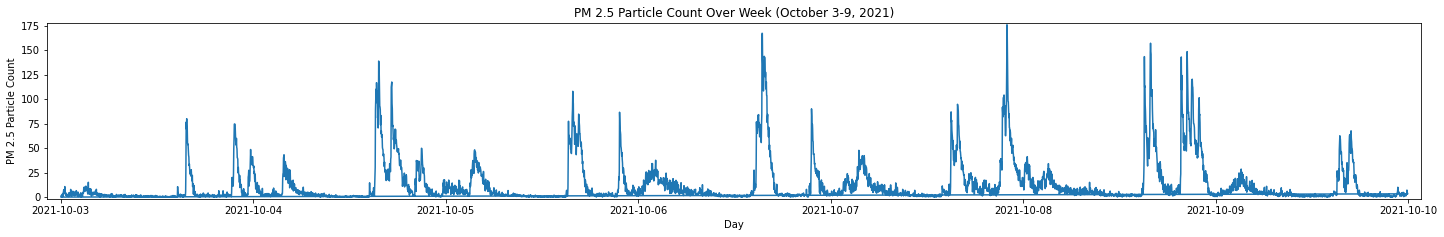

In [44]:
hide_me

oct_2021 = ut_stadium[(ut_stadium['Year'] == 2021) | (ut_stadium['Month'] == 'Oct')]
oct_3_9 = oct_2021[(oct_2021['Day']>=3) & (oct_2021['Day']<=9)]
# lst = oct_3_9['created_at'].astype(str).tolist()
# lst_1 = [i.split(' ', 1)[1] for i in lst]
# lst_2 = [i.split('+', 1)[0] for i in lst_1]
# oct_3_9 = oct_3_9.copy()
# oct_3_9['time'] = np.asarray(lst_2).copy()
# grp_day = oct_3_9.groupby('Day').mean().reset_index()
# day_pm = grp_day[['Day', '2.5um/dl']]
fig = plt.figure(figsize=(20,3))
# x = day_pm['Day']
# y = day_pm['2.5um/dl']
plt.plot(oct_3_9['created_at'], oct_3_9['2.5um/dl'])
#plt.xticks(x,  rotation='vertical')
plt.margins(0.01)
fig.tight_layout()
#plt.xticks(oct_3_9['created_at'], oct_3_9['Day'], rotation ='vertical')
plt.xlabel('Day')
plt.ylabel('PM 2.5 Particle Count')
plt.title('PM 2.5 Particle Count Over Week (October 3-9, 2021)')
plt.show()

The second plot below shows the PM 2.5 particle count over the month of October 2021.

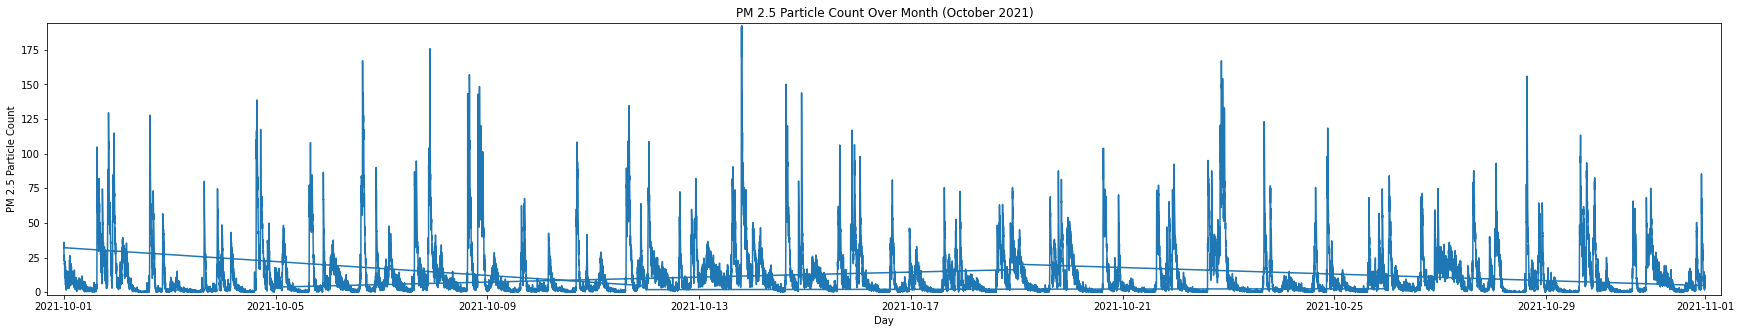

In [45]:
hide_me
oct_21 = ut_stadium[(ut_stadium['Year'] == 2021) | (ut_stadium['Month'] == 'Oct')]
# lst = oct_21['created_at'].astype(str).tolist()
# lst_1 = [i.split(' ', 1)[1] for i in lst]
# lst_2 = [i.split('+', 1)[0] for i in lst_1]
# oct_21 = oct_21.copy()
# oct_21['time'] = np.asarray(lst_2).copy()
# grp_day = oct_21.groupby(['Day']).mean().reset_index()
# day_pm = grp_day[['Day', '2.5um/dl']]
ax = plt.figure(figsize=(30,5))
# x = day_pm['Day']
# y = day_pm['2.5um/dl']
plt.plot(oct_21['created_at'], oct_21['2.5um/dl'])
#plt.xticks(x,  rotation='vertical')
plt.margins(0.01)
fig.tight_layout()
plt.xticks(rotation = 0)
plt.xlabel('Day')
plt.ylabel('PM 2.5 Particle Count')
plt.title('PM 2.5 Particle Count Over Month (October 2021)')
plt.show()

The third plot below shows the PM 2.5 particle count over the year 2021.

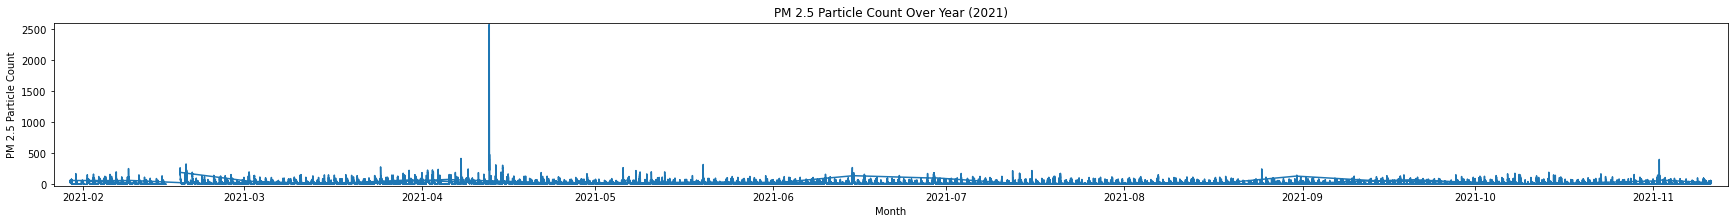

In [46]:
hide_me
twenty_one = ut_stadium[ut_stadium['Year'] == '2021']
# lst = twenty_one['created_at'].astype(str).tolist()
# lst_1 = [i.split(' ', 1)[1] for i in lst]
# lst_2 = [i.split('+', 1)[0] for i in lst_1]
# twenty_one = twenty_one.copy()
# twenty_one['time'] = np.asarray(lst_2).copy()
# grp_day = twenty_one.groupby(['Month']).mean().reset_index()
# day_pm = grp_day[['Month', '2.5um/dl']]
# day_pm = day_pm.copy()
# day_pm['month_num'] = np.array([4, 8, 2, 1, 7, 6, 3, 5, 11, 10, 9]).copy()
# sort_month = day_pm.sort_values('month_num', ascending = True)
ax = plt.figure(figsize=(30,3))
# x = sort_month['Month']
# y = sort_month['2.5um/dl']
plt.plot(twenty_one['created_at'], twenty_one['2.5um/dl'])
# plt.xticks(x,  rotation='vertical')
plt.margins(0.01)
fig.tight_layout()
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('PM 2.5 Particle Count')
plt.title('PM 2.5 Particle Count Over Year (2021)')
plt.show()

<br>

While the line plots do show us a trend in the PM2.5 count over time, we still have not clue how that translates to the API Index. The next section will discuss what AQI is and how it is calculated.

### AQI Index
The AQI Index contains 6 categories that air quality can fall into. Each category contains a range of index values from 0 - 500 that is calculated from the regions PM 2.5 measure. The chart below is provided by the US Environmental Protection Agency (EPA) and shows the official AQI Index (these breakpoints were revised in 2012). 

For more information on how AQI Index is calculated, take a look at the AQI Index Factsheet provided by the EPA [here](https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf)!

<p align="center">
  <img src="images/AQI-category.png" width="" height="" align="center">
</p>

Now that we know how sesors work, what they measure and how AQI Indexes are calculated, let's see if we can create a visualization of AQI Indexes that are a little closer to home!

First, let's find a group of sensors that are in Texas. We use a range of longitude and latitude coordinates to decide whether to include or exclude a sensor. Below is a dataframe of sensors in Texas.


In [47]:
hide_me

TX_data = df.loc[(df["lat"] >= 25.9) & (df["lat"] <= 34.1) & (df["lon"] >= -104.9) & (df["lon"] <= -93.1)]
TX_data = TX_data[["lat", "lon", "name", "location_type", "pm_2.5", "temp_f", "humidity", "pressure"]]
TX_data

,lat,lon,name,location_type,pm_2.5,temp_f,humidity,pressure
id,,,,,,,,
25999,30.053808,-95.494643,Villages of Bridgestone AQI,outside,10.80,72.0,55.0,1016.10
74265,29.939444,-95.671354,16815 Flower Mist Lane,inside,3.25,81.0,32.0,1016.57
30327,33.346098,-96.355190,"236 County Road 5020, Blue Ridge, Texas 75424-...",outside,4.11,67.0,100.0,714.77
83065,30.246557,-98.065587,301 Barton Creek Dr,outside,5.98,68.0,41.0,980.13
98139,29.818880,-95.695667,"3623 Shadow Trail, Houston, Texas 77084",outside,5.63,75.0,47.0,1016.78
...,...,...,...,...,...,...,...,...
34431,29.762515,-95.465982,WPI-2,inside,0.00,81.0,37.0,1015.64
27629,33.538329,-101.781656,Yellow House Canyon,outside,0.85,64.0,27.0,908.21
65197,30.261005,-97.770814,Zilker #1,outside,11.96,67.0,53.0,1001.75


<br>

Now that we have a smaller subset of data to work with, the next step is to use the PM 2.5 measures to assign each sensor to an AQI Index Category and corresponding color. 

In [48]:
hide_me

#creating a column that indicates the AQI code name
color_code = []
for i in TX_data["pm_2.5"].to_list():
    if i <= 12.0:
        color_code.append('green')
    elif (i < 12) & (i <=35.4):
        color_code.append('yellow')
    elif (i < 35.5) & (i <=55.4):
        color_code.append('orange')   
    elif (i < 55.5) & (i <=150.4):
        color_code.append('red')
    elif (i < 150.5) & (i <=250.4):
        color_code.append('purple')
    else:
        color_code.append('darkpurple')

TX_data['code'] = color_code



Our last step is to use the longitude and latitude coordinates to map the relative location of the sensor with is corresponding AQI Index color! The widget below contains two sliders. One represents the Latitude value and the other is the Longitude value. 

**Slide the sliders left and right to display a mapping of the sensors in that latitude and longitude region.**

**Hint: Rio Grande, TX - Lat: 26.3798 / Lon: -98.8203** 

In [49]:
hide_me

def map(Latitude ,Longitude):
    m = folium.Map(width=830, height=450, location=[Latitude, Longitude])
    
    for i in np.arange(len(TX_data) - 1):
        folium.Marker(
            location=[TX_data.iloc[i]['lat'], TX_data.iloc[i]['lon']],
            popup=TX_data.iloc[i]['name'],
            icon=folium.Icon(color=TX_data.iloc[i]['code']),
        ).add_to(m)
    display(m)
    
interact(map, Latitude = (26, 34, 0.001) , Longitude = (-103, -93, 0.001));
## Houston, TX - Lat: 29.7604 / Lon: -95.3698

interactive(children=(FloatSlider(value=30.0, description='Latitude', max=34.0, min=26.0, step=0.001), FloatSl…

Now that we have created a map we can easily see what the AQI index is across the city! 

<br>

**QUESTION: What do you notice about the map?**

*Your answer here*

<br>

Developed By: Ziyue Li, Melisa Esqueda, Maham Bawaney & Karalyn Chong 